In [1]:
import pickle
import matplotlib.pylab as plt
import numpy as np

In [74]:

# Load moving bar responses 

speeds = [0.14,0.42,0.7,0.98,1.96]
cell_nb = 379

experiment_name = "20210907_tbt_1"
fp = "/Users/simone/Documents/Experiments/motion_anticipation/Simone/small_anticipation_dict.pickle"
with open(fp, 'rb') as handle:
   small_dict= pickle.load(handle)


In [80]:
# load simulations

sim_small_dict = {}
sim_small_dict['response']={}
sim_small_dict['time']={}

for s in speeds:
   simulation_name = f'Reciporcal_test/wBA/wBA_46.0/smooth_{s}/'
   fp = f"/Users/simone/Documents/Simulations/motion_anticipation_network/{simulation_name}"
   with open(f"{fp}/out", 'rb') as handle:
      out= pickle.load(handle)

   with open(f"{fp}/params", 'rb') as handle:
      params= pickle.load(handle)

   sim_dt = params['dt']
   sim_d = params['duration']

   sim_time = np.arange(0,sim_d,sim_dt) - params['tps_rf_GC_mid'][150]
   sim_bar_response = out['RG']

   sim_small_dict['response'][s] = sim_bar_response
   sim_small_dict['time'][s] = sim_time

Text(0.5, 0.98, 'Data vs Simulation')

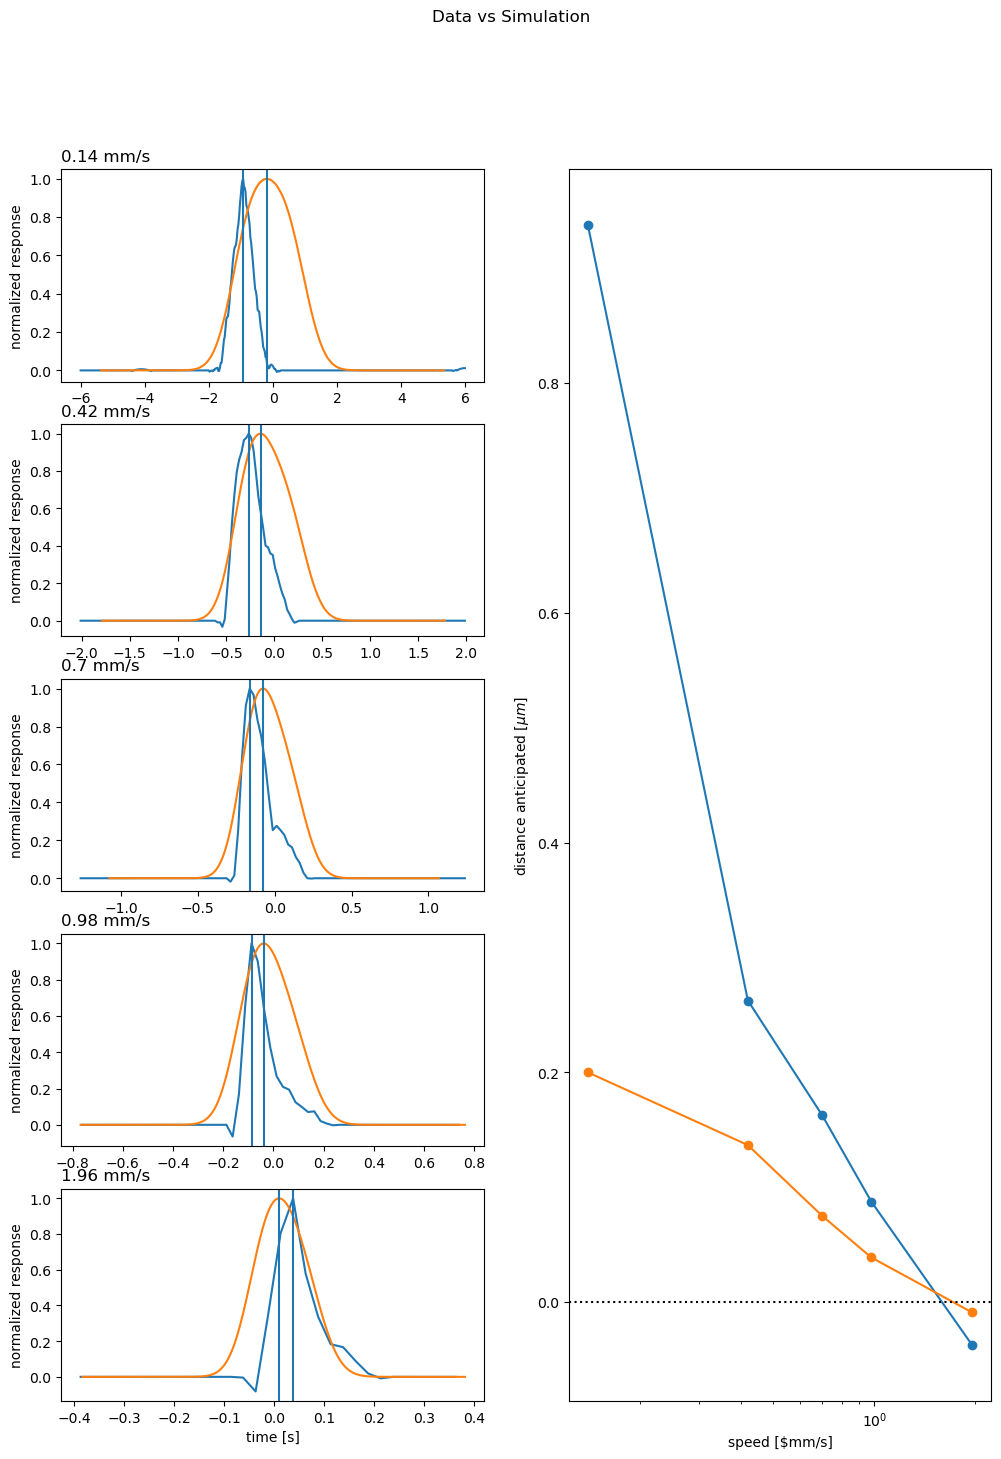

In [86]:
fig = plt.figure(figsize = (12,16))
gs = fig.add_gridspec(nrows=len(speeds),ncols=2)

antis = []
sim_antis = []
for i,speed in enumerate(speeds):

    ax = fig.add_subplot(gs[i,0])

    bar_response = small_dict[cell_nb]['centered_bar_responses'][speed]
    time = small_dict['times'][speed]

    anti = time[np.argmax(bar_response)]

    sim_bar_response = sim_small_dict['response'][speed]
    sim_time = sim_small_dict['time'][speed]

    sim_anti = sim_time[np.argmax(sim_bar_response)]
    ax.plot(time,bar_response/np.max(bar_response), label = 'experiment')
    ax.plot(sim_time,sim_bar_response/np.max(sim_bar_response), label = 'simulaiion')
    ax.axvline(anti)
    ax.axvline(sim_anti)
    ax.set_title(f'{speed} mm/s', loc = 'left')
    ax.set_ylabel('normalized response')

    antis.append(-1*anti)
    sim_antis.append(-1*sim_anti)


ax.set_xlabel('time [s]')

ax = fig.add_subplot(gs[:,1])

plt.scatter(speeds,antis, label = 'experiment')
plt.scatter(speeds,sim_antis, label = 'simulation')

plt.plot(speeds,antis)
plt.plot(speeds,sim_antis)
plt.axhline(0, color = 'k', linestyle = ':')
ax.set_xscale('log')
ax.set_ylabel(f'distance anticipated [$\mu m$]')
ax.set_xlabel('speed [$mm/s]')

fig.suptitle('Data vs Simulation')

In [87]:
antis

[0.9375,
 0.2625000000000002,
 0.1625000000000001,
 0.08750000000000002,
 -0.03750000000000003]